<h1 class="text-center text-success">Airline Price Prediction</h1>

### *Problem Statement*

Travelling through flights has become an integral part of today’s lifestyle as more and more people are opting for faster travelling options. The flight ticket prices increase or decrease every day by day. And it depending on various factors like timing of the flights, destination, duration of flights, various occasions such as vacations or festive season. Therefore, having some basic idea of the flight prices before planning the trip will surely help many people save money and time.

### *Project Objective*

The project objective is to develop a model that can accurately forecasts the flight ticket prices. aims to provide users with insights into price trends, assist in making informed booking decisions, and notify users of favorable price changes.

### About Dataset

The Data is collected from <a href='https://www.kaggle.com/datasets/jillanisofttech/flight-price-prediction-dataset'>Kaggle.com</a>

The Various Features of Dataset are explained below:
* **Airline**: The name of the airline company.
* **Source City**: City from which the flight takes off.
* **Destination City**: City where the flight will land.
* **Departure time**: The time when flight start jounrney.
* **Arrival time**: The time when flight ends journey.
* **Stop**: The number stops between the source and destination.
* **Duration**: The total time taken to arrived at destination from source.
* **Class**: Type of cabin.
* **Price**: The target variable which predicts the ticket price.

## Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing Dataset
dataset = pd.read_excel('Data/Airline_data.xlsx')

In [3]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Exploratory Data Analysis

In [4]:
dataset.shape # Checking how many rows and columns contains

(10683, 11)

In [5]:
dataset.info() # Checking infomartion of each variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
dataset.describe() #Checking Statistical measures of dataset

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


### Univariate data Analysis

In [7]:
# Counting different Airlines
dataset['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

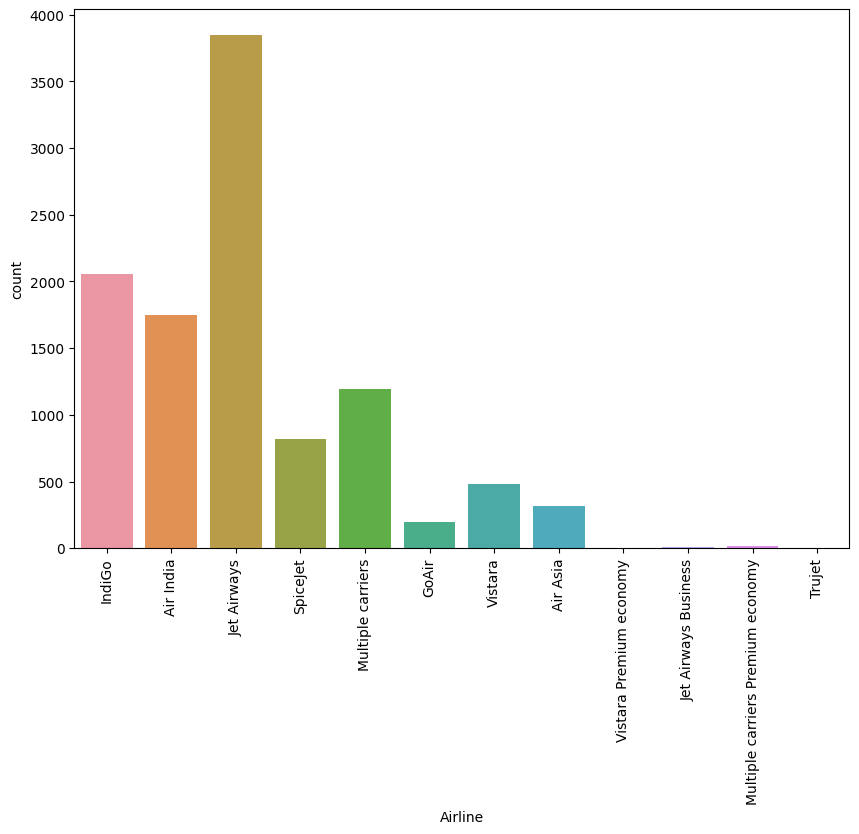

In [8]:
plt.figure(figsize=(10, 7))
sns.countplot(data=dataset, x='Airline')
plt.xticks(rotation=90)
plt.show()

* There are total 12 Airlines availables in the dataset.
* Jet Airways has the most airlines.
* Truject has the least arilines.

In [9]:
# Counting different Sources
dataset['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

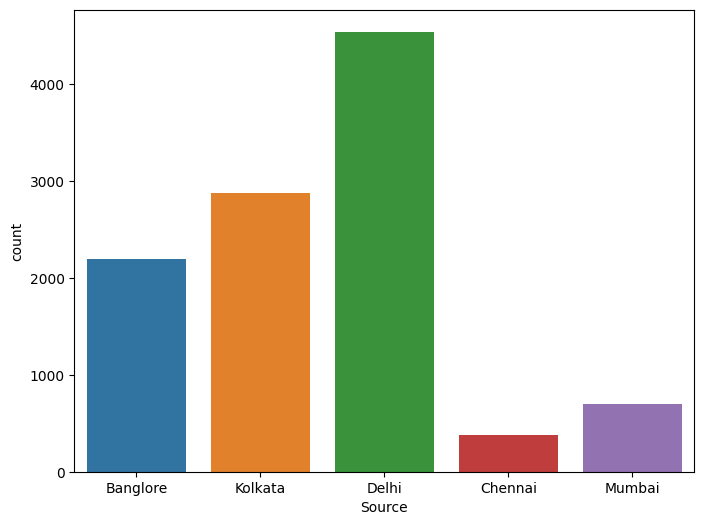

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Source')
plt.show()

In [11]:
# Counting different Sources
dataset['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

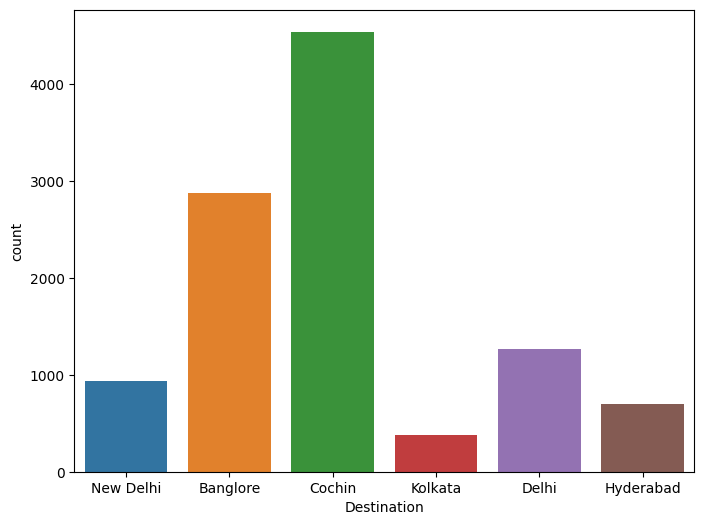

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(data=dataset, x='Destination')
plt.show()

In [13]:
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [14]:
dataset['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

## Data Preprocessing

Convert All date & time related variable to datetime

In [15]:
# Converting the 'Date_of_journey' column to datatime
dataset['Date_of_Journey'] = pd.to_datetime(dataset['Date_of_Journey'], format='%d/%m/%Y')

In [16]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [17]:
print(dataset['Date_of_Journey'].dtype)

datetime64[ns]


In [18]:
# Extracting day & creating new column called journey_day
dataset['Journey_day'] = dataset['Date_of_Journey'].dt.day

In [19]:
# Extracting month & creating new column called journey_month
dataset['Journey_month'] = dataset['Date_of_Journey'].dt.month

In [20]:
dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
# Droping Date of Journey column
dataset.drop('Date_of_Journey', axis=1, inplace=True)

In [22]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [23]:
dataset['Arrival_Time'] = pd.to_datetime(dataset['Arrival_Time'])

In [24]:
# Extracting hour of arrival & creating new column called arrival_hour
dataset['Arrival_hour'] = dataset['Arrival_Time'].dt.hour

In [25]:
dataset['Arrival_minute'] = dataset['Arrival_Time'].dt.minute

In [26]:
dataset.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,2023-06-01 13:15:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,6,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,2023-06-01 23:30:00,5h 25m,1 stop,No info,6218,12,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,2023-06-01 21:35:00,4h 45m,1 stop,No info,13302,1,3,21,35


In [27]:
# Droping Arrival Time column form the dataset
dataset.drop('Arrival_Time', axis=1, inplace=True)

In [28]:
dataset['Dep_Time'] = pd.to_datetime(dataset['Dep_Time'])

In [29]:
dataset.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-01 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-01 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-01 09:25:00,19h,2 stops,No info,13882,9,6,4,25


In [30]:
dataset['Dep_hour'] = pd.to_datetime(dataset['Dep_Time']).dt.hour
dataset['Dep_minute'] = pd.to_datetime(dataset['Dep_Time']).dt.minute

In [31]:
dataset.head(3)

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2023-06-01 22:20:00,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-06-01 05:50:00,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2023-06-01 09:25:00,19h,2 stops,No info,13882,9,6,4,25,9,25


In [32]:
dataset.drop('Dep_Time', axis=1, inplace=True)

In [33]:
dataset.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,4,25,9,25


The Duration column is the time taken by plane to reach destination. it is the difference between Departure time and Arrival Time.

In [34]:
duration = list(dataset['Duration'])

In [35]:
duration

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [36]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2: # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h" + duration[i] 
            
duration_hours = []
duration_mins = []

for j in range(len(duration)):
    # Extract hours from duration
    duration_hours.append(int(duration[j].split(sep="h")[0])) 
    # Extracts only minutes from duration
    duration_mins.append(int(duration[j].split(sep="m")[0].split()[-1].replace("h", "").replace("m", ""))) 

In [37]:
dataset['Duration_hours'] = duration_hours
dataset['Duration_minutes'] = duration_mins

In [38]:
dataset.drop('Duration', axis=1, inplace=True)

In [39]:
dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Arrival_hour,Arrival_minute,Dep_hour,Dep_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,4,25,9,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,21,35,16,50,4,45


In [40]:
# Checking is there any null values

dataset.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Total_Stops         1
Additional_Info     0
Price               0
Journey_day         0
Journey_month       0
Arrival_hour        0
Arrival_minute      0
Dep_hour            0
Dep_minute          0
Duration_hours      0
Duration_minutes    0
dtype: int64

In [41]:
dataset.dropna(inplace=True)

In [42]:
dataset.isnull().sum().any()

False

In [43]:
dataset.duplicated().sum()

222

In [44]:
dataset.drop_duplicates(inplace=True)

In [45]:
dataset.duplicated().sum()

0

### Lableing Categorical Variables

In [46]:
from sklearn.preprocessing import LabelEncoder

lbn = LabelEncoder()

In [47]:
dataset['Airline'] = lbn.fit_transform(dataset['Airline'])
dataset['Source'] = lbn.fit_transform(dataset['Source'])
dataset['Destination'] = lbn.fit_transform(dataset['Destination'])

In [48]:
dataset['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3473
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [49]:
dataset['Total_Stops'] = dataset['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

In [50]:
dataset['Total_Stops'].value_counts()

Total_Stops
1    5625
0    3473
2    1318
3      43
4       1
Name: count, dtype: int64

In [51]:
dataset.drop(['Route','Additional_Info'], axis=1, inplace=True)

In [52]:
dataset.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_hour', 'Arrival_minute',
       'Dep_hour', 'Dep_minute', 'Duration_hours', 'Duration_minutes'],
      dtype='object')

<Axes: >

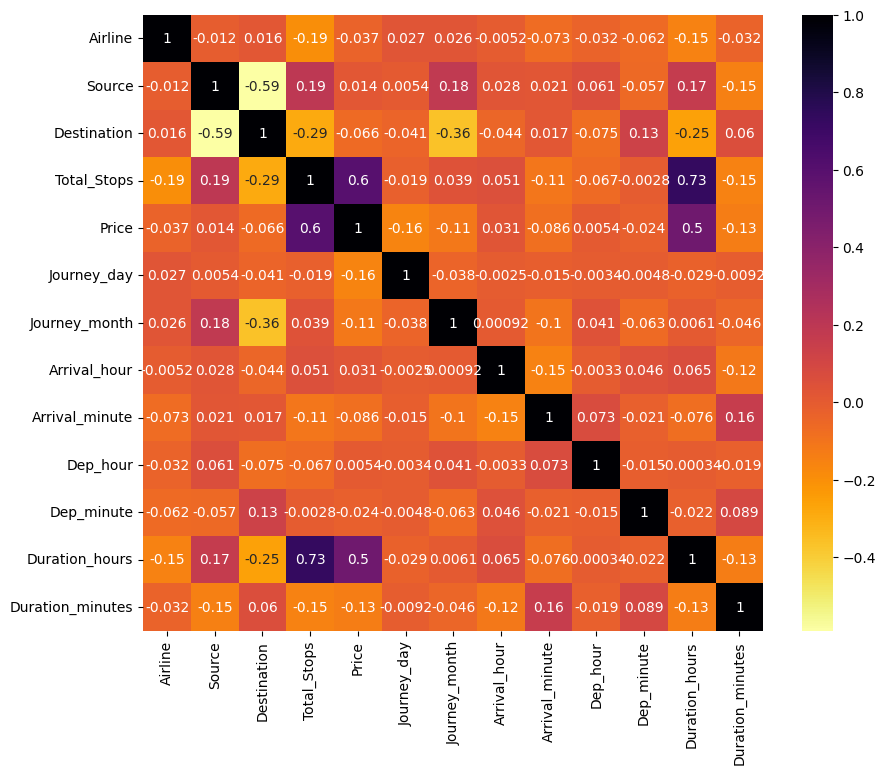

In [53]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap=plt.cm.inferno_r)

## Train & Test Split

In [54]:
x = dataset.drop('Price', axis=1)
y = dataset['Price']

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Model Buildiing

In [56]:
# Function for check performance of model
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

score_df = pd.DataFrame(columns=['Model','Score'])
a = []
b = []
def get_metric(x,y, model=None):
    r = r2(x,y)*100
    
    print('MAE : {:.2f}'.format(mae(x,y)*100))
    print('MSE : {:.2f}'.format(mse(x,y)*100))
    print('RMSE : {:.2f}'.format(np.sqrt(mse(x,y)*100)))
    print('R2 : {:.2f}%'.format(r))
    
    if model != None:
        a.append(model)
        b.append(r)

### 1.) Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

In [58]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [59]:
lr_pred = lr_model.predict(x_test)

In [60]:
get_metric(lr_pred, y_test, model='Linear Regression')

MAE : 246270.69
MSE : 1087673670.30
RMSE : 32979.90
R2 : -13.67%


**Inference** :- The used Linear Regression model has high errors and it has a negative r2 which that performs worse.

### 2.) KNN

In [61]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

In [62]:
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [63]:
knn_pred = knn.predict(x_test)

In [64]:
get_metric(knn_pred, y_test, model='KNN')

MAE : 177719.71
MSE : 744152142.31
RMSE : 27279.15
R2 : 46.95%


**Inference** : KNN model also have high errors and it has very low r2.

### 3.) SVR

In [65]:
from sklearn.svm import SVR

svm = SVR(kernel='linear')

In [66]:
svm.fit(x_train, y_train)

SVR(kernel='linear')

In [67]:
svm_pred = svm.predict(x_test)

In [68]:
get_metric(svm_pred, y_test, model='SVR')

MAE : 249919.72
MSE : 1338301539.06
RMSE : 36582.80
R2 : -80.81%


**Inference** :- This model is also negatively result. 

### 4.) Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

In [70]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

In [71]:
tree_ped = tree_model.predict(x_test)

In [72]:
get_metric(tree_ped, y_test, model='Decision Tree')

MAE : 136423.62
MSE : 554122399.85
RMSE : 23539.80
R2 : 72.00%


### 5.) RandomForest

In [73]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()

In [74]:
rf_model.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
rf_pred = rf_model.predict(x_test)

In [76]:
get_metric(rf_pred ,y_test, model='RandomForest')

MAE : 119963.31
MSE : 384853891.93
RMSE : 19617.69
R2 : 78.64%


In [77]:
# DataFrame to Analyze All model performance
df = pd.DataFrame({
    'Model': a,
    'Score': b
})
df['Score'] = df['Score'].apply(lambda x: '{:.2f}%'.format(x))

In [78]:
df

,Model,Score
0,Linear Regression,-13.67%
1,KNN,46.95%
2,SVR,-80.81%
3,Decision Tree,72.00%
4,RandomForest,78.64%


**Inference** : Among all the model, RandomForest have the most Score. Linear Regression and SVR has negative score.

## Hyperparameter Tuning

In [79]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in range(10,101,5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in range(6, 15)]
min_samples_split = [2, 5, 10, 15, 50]
min_samples_leaf = [1, 2, 5, 10]

# Creating a Parameter's dataframe
random_df={'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf
          }

In [80]:
rCV = RandomizedSearchCV(estimator=rf_model, param_distributions=random_df, scoring='neg_mean_squared_error',
                             n_iter=10,cv=3,random_state=10)

In [81]:
rCV.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50],
                                        'n_estimators': [10, 15, 20, 25, 30, 35,
                                                         40, 45, 50, 55, 60, 65,
                                                         70, 75, 80, 85, 90, 95,
                                                         100]},
                   random_state=10, scoring='neg_mean_squared_error')

In [82]:
rcv_pred = rCV.predict(x_test)

In [83]:
get_metric(rcv_pred, y_test)

MAE : 119002.43
MSE : 335660885.72
RMSE : 18321.05
R2 : 80.19%


# Saving the Model

In [84]:
# import pickle 

# filename = 'model.pkl'
# pickle.dump(rCV, open(filename, 'wb'))